# UK Online retail data
### data from: https://archive.ics.uci.edu/ml/datasets/online+retail#
### UK online retail data from (1.12. 2010 ~ 9.12. 2011)
## 1. Look around the data

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

In [3]:
oln = pd.read_excel("Online Retail.xlsx")

In [4]:
oln.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Categorical variables: possible to calculate 'frequency'
    #{InvoiceNo   StockCode  Description   Country   }
#Continuous variables: possible to calculate 'min/max ..etc'
    #{Quantity UnitPrice  CustomerID  }

In [6]:
oln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
oln.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
oln.describe(include = np.object)

C:\Users\hyung\AppData\Local\Temp\ipykernel_5184\4215877991.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  oln.describe(include = np.object)


,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [9]:
print("The total number of data: ", oln.shape[0]*oln.shape[1])
print("The total number of null values: {} and it occupies {:.2f}% of the total ".format(oln.isnull().sum().sum(), (oln.isnull().sum().sum()*100)/(oln.shape[0]*oln.shape[1])))
print("The total number of countries: ", oln.Country.nunique())
print("The total number of items sold: ", oln.Description.nunique())


The total number of data:  4335272
The total number of null values: 136534 and it occupies 3.15% of the total 
The total number of countries:  38
The total number of items sold:  4223


## 2.Questions
### *Who would spend the most?
### *The distribution of Unit Price?
### *Which items have the most highest order volume?
### *Let's check the sales amount by dates
### *Does the order quantity differ depending on the day of the week?
### *What is average purchase price by country?
### *What is the main keywords of items sold in this online shop? 


## 3. Data Preprocessing

### 3-1. Rename the columns.

In [10]:
oln.columns = oln.columns.str.lower()
oln.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

### 3-2. Preprocess the null values.

In [11]:
oln.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [12]:
oln[oln.isnull().any(axis=1)].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [13]:
# If there aren't 'Customer ID' in data, analyzing this dataset should be harder 
# thus I am going to drop all the null values.
oln = oln.dropna()
oln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    406829 non-null  object        
 1   stockcode    406829 non-null  object        
 2   description  406829 non-null  object        
 3   quantity     406829 non-null  int64         
 4   invoicedate  406829 non-null  datetime64[ns]
 5   unitprice    406829 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### 3-3.Modify the types of columns.

In [14]:
# customerid; float64 >> int64
oln['customerid'] = oln['customerid'].astype('int64')
oln.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### 3-4. Add new columns

In [15]:
print(min(oln['quantity']), max(oln['quantity']))

-80995 80995


In [16]:
# If quantity < 0 , that means canceling orders?
oln = oln[oln.quantity > 0]

In [17]:
oln['spent'] = oln['quantity'] * oln['unitprice']
oln.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [18]:
# Separate the 'datetime' column into 5 columns to aggregate monthly sales.
oln['year'] = oln['invoicedate'].dt.year      # year
oln['month'] = oln['invoicedate'].dt.month    # month
oln['day'] = oln['invoicedate'].dt.day        # day
oln['weekday'] = oln['invoicedate'].dt.weekday# the day of the week
oln['hour'] = oln['invoicedate'].dt.hour    # hour
oln.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8


## 4.EDA & Visualization

### 4-1. Simple analysis

In [21]:
# Top10 items ordered
oln.description.value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: description, dtype: int64

[Text(0, 0, 'United Kingdom'),
 Text(1, 0, 'Germany'),
 Text(2, 0, 'France'),
 Text(3, 0, 'EIRE'),
 Text(4, 0, 'Spain')]

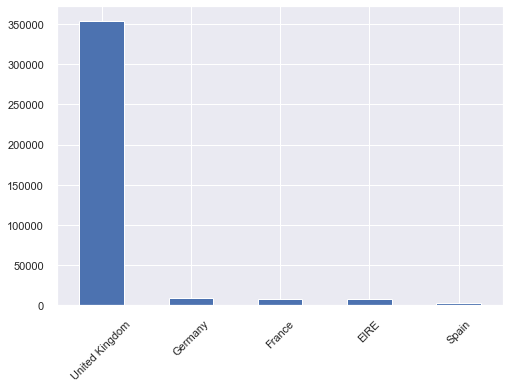

In [26]:
#Top 5 countries with higher order volumne
g = oln.country.value_counts().head(5).plot.bar()
g.set_xticklabels(g.get_xticklabels(), rotation = 45)

In [32]:
# Who spent the most?
# Who spent the least?
res1 = oln[['customerid','spent']].groupby(['customerid']).sum()
res1.sort_values('spent', ascending = False)

res1 = res1[(res1['spent'] > 0)] #구매 금액이 0 이상인 고객만 산출하기
res1
print('customerid {} spent the most as {:.2f}'.format(int(res1['spent'].argmax()),res1['spent'].max()))
print('customerid {} spent the least as {:.2f}'.format(int(res1['spent'].argmin()),res1['spent'].min()))

customerid 1689 spent the most as 280206.02
customerid 3217 spent the least as 3.75


<AxesSubplot:xlabel='unitprice'>

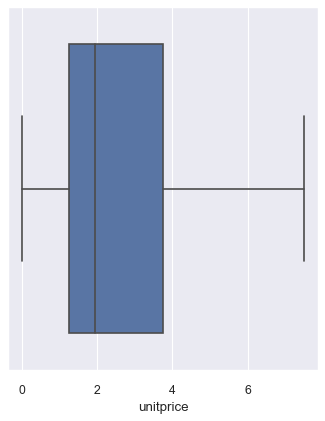

In [33]:
# The ditribution of unitprice as a box plot.

f, ax = plt.subplots(1, 1, figsize=(5, 6), dpi = 80)


sns.boxplot(oln['unitprice'], showfliers = False, ax=ax)

# The unit price is generally located near 2 pounds.

In [36]:
#Check the characteristics of unitprice
chk1 = oln[oln['unitprice']<=8].shape[0]/oln['unitprice'].shape[0]*100
print("The unitprice which is under 8 pounds occupies {:.2f} % .".format(chk1))

The unitprice which is under 8 pounds occupies 93.28 % .


In [39]:
#Check the characteristics of unitprice
chk2 = np.sum(oln[oln['unitprice']<=8].spent)/np.sum(oln.spent)*100
print("{:.2f} % of the profit occurred in the items which are placed near 8 pounds.".format(chk2))

88.09 % of the profit occurred in the items which are placed near 8 pounds.


### 4-2. Show the 'spent' by dates (Time-series analysis)

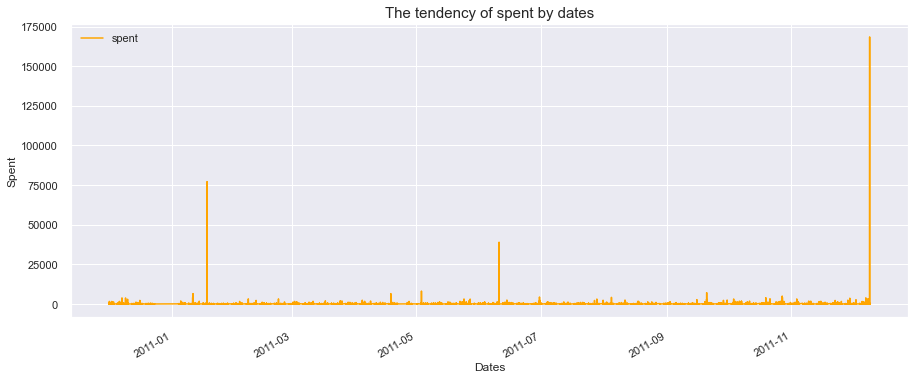

In [40]:
oln.plot(x = 'invoicedate', y = 'spent', color='orange', figsize=(15, 6))

plt.title("The tendency of spent by dates", fontsize = 15)
plt.xlabel('Dates')
plt.ylabel('Spent')

plt.show()
#If I were a actual seller, I would analyze what happened at the day and why sold at the most.

### 4-3. The orders volume by the day of the week & hours

In [42]:
# Drop the duplicates of 'invoiceno' depending on the day of the week.
res2 = oln.drop_duplicates(['invoiceno'], keep='first')
res2

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,2,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010,12,1,2,8
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,2010,12,1,2,8
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,17.85,2010,12,1,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00,2011,12,9,4,12
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777,United Kingdom,51.84,2011,12,9,4,12
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804,United Kingdom,4.68,2011,12,9,4,12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,2011,12,9,4,12


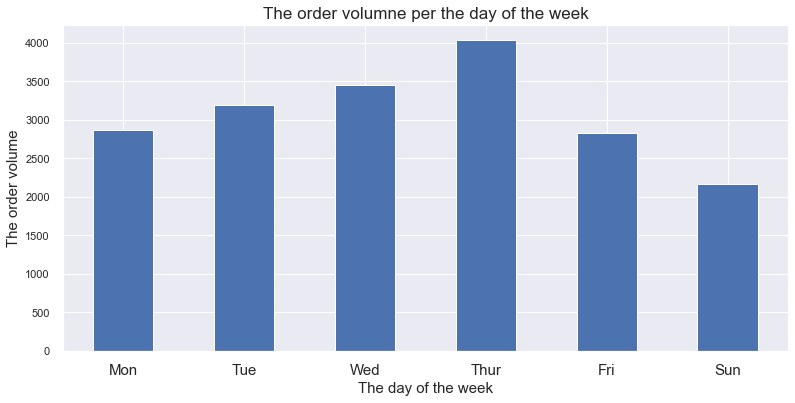

In [43]:
#Check the order volume by the day of the week based on 'invoiceno'
g1 = res2[['weekday','invoiceno']].groupby('weekday').count().plot(kind='bar', figsize=(13,6))

g1.set_xlabel('The day of the week',fontsize=15)
g1.set_ylabel('The order volume',fontsize=15)
g1.set_title('The order volume per the day of the week',fontsize=17)
g1.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
g1.legend('') #not necessary legend.

plt.show()

In [44]:
#Count the 'invoiceno' per hour
res3 = res2[['hour','invoiceno']].groupby('hour').count()
res3

,invoiceno
hour,
6,1
7,29
8,555
9,1394
10,2226
11,2277
12,3129
13,2637
14,2275


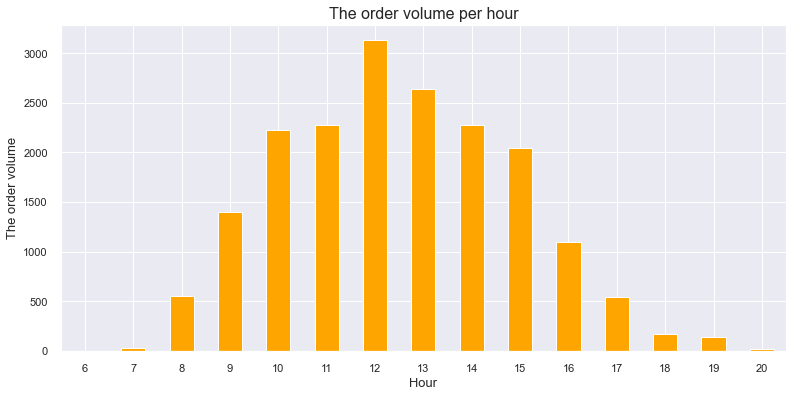

In [45]:
#Count the 'invoiceno' per hour based on 'invocieno'
g2 = res3.plot(kind='bar', color = 'orange', figsize=(13,6))

g2.set_xlabel('Hour',fontsize=13)
g2.set_ylabel('The order volume',fontsize=13)
g2.set_title('The order volume per hour',fontsize=16)
g2.legend('')

plt.xticks(rotation=0)
plt.show()

### 4-4. The average 'spent' by countries per order

In [46]:
#Count the order volume by countries, and divide the'spent' by 'invoiceno'
res4 = oln[['quantity', 'spent', 'country', 'invoiceno']]
res4

,quantity,spent,country,invoiceno
0,6,15.30,United Kingdom,536365
1,6,20.34,United Kingdom,536365
2,8,22.00,United Kingdom,536365
3,6,20.34,United Kingdom,536365
4,6,20.34,United Kingdom,536365
...,...,...,...,...
541904,12,10.20,France,581587
541905,6,12.60,France,581587
541906,4,16.60,France,581587
541907,4,16.60,France,581587


In [47]:
##Aggregate the 'invoiceno' by 'country' and add the tempory 'count' column.
aa = res4.groupby(['country', 'invoiceno']).sum()
aa['count'] = 1
aa

quantity    spent  count
country     invoiceno                          
Australia   536389          107   358.25      1
            537676          214   258.90      1
            539419          146   415.70      1
            540267         4662  7011.38      1
            540280          140   143.00      1
...                         ...      ...    ...
Unspecified 559929          271   252.05      1
            561658          205   347.35      1
            561661          114   199.08      1
            563947          126   252.90      1
            564051           59   278.13      1

[18536 rows x 3 columns]

In [48]:
#If I sum aa by 'country' count.sum() = order volume by countries.
bb = aa.groupby('country').sum()
bb

,quantity,spent,count
country,,,
Australia,84209,138521.310,57
Austria,4881,10198.680,17
Bahrain,260,548.400,2
Belgium,23237,41196.340,98
Brazil,356,1143.600,1
Canada,2763,3666.380,6
Channel Islands,9491,20450.440,26
Cyprus,6361,13590.380,16
Czech Republic,671,826.740,2


In [49]:
#Then I can aggregate the average 'spent' by countries per order.
bb['avg_spent'] = bb['spent'] / bb['count']
bb.sort_values(['count','avg_spent'], ascending=False, inplace=True)
bb.head()

,quantity,spent,count,avg_spent
country,,,,
United Kingdom,4269472,7308391.554,16649,438.968800
Germany,119263,228867.140,457,500.803370
France,111472,209024.050,389,537.336889
EIRE,140525,265545.900,260,1021.330385
Belgium,23237,41196.340,98,420.370816


Text(0.5, 0, 'Sales')

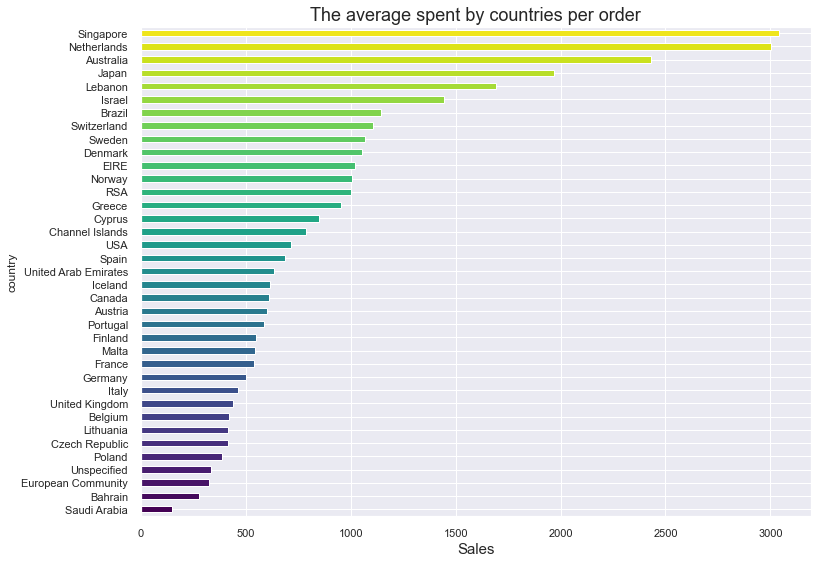

In [51]:
#Visualization
colors = plt.cm.viridis(np.linspace(0, 1, 38))

bb['avg_spent'].sort_values().plot(kind='barh',figsize=(12,9),color=colors)
plt.title('The average spent by countries per order', size=18)
plt.xlabel('Sales',size=15)

### 4-5. The most frequent words in 'description'

In [52]:
#Improt the word cloud package.
from wordcloud import WordCloud
from wordcloud import STOPWORDS

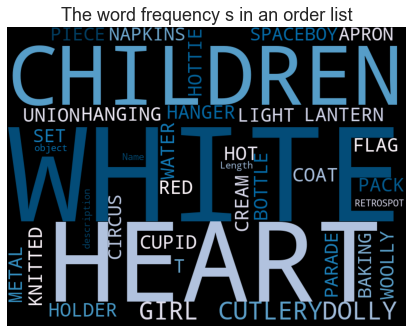

In [58]:
#Visualization
stopwords = set(STOPWORDS)
stopwords.add('dtype') #Except for 'dtype' words.

wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=800, height=600, colormap = 'PuBu').generate(str(oln['description']))

plt.axis('off')
plt.title('The word frequency s in an order list', fontsize = 18)
plt.imshow(wordcloud)
plt.show()

## 5.Review

### UK Online Retail Data:
#### The total number of data:  4335272
#### The total number of null values: 136534 and it occupies 3.15% of the total 
#### The total number of countries:  38
#### The total number of items sold:  4223

### Q: Who spent the most?
#### A: 'customerid' 1689 spent the most as 280206.02
### Q: Who spent the fewest?
#### A: 'customerid' 3217 spent the least as 3.75

### Q:The distribution of unitprice?
#### A: The unit price is generally located near 2 pounds.
####    The unitprice which is under 8 pounds occupies 93.28 %.
####    88.09 % of the profit occurred in the items which are placed near 8 pounds.

### Q: What kind of items were recorded the highest order?
#### A: WHITE HANGING HEART T-LIGHT HOLDER

### Q: Does the order volume differ by the day of the week & hours?
#### A: Thursday had the most orders and Sunday had the fewest orders.

### Q: What is the average 'spent' by countries per order
#### A: UK had the highest sales, but Singapore had the highest per capita purchases.

### Q: What is the main keywords in the items?
#### A: White, Heart, Children